# MBA FIAP Inteligência Artificial & Machine Learning

## Visão Computacional: Análise de Imagens Médicas

## 1. Introdução

As tecnologias de imagens médicas estão cada vez mais integradas aos sitemas de visão computacional, incluindo as imagens de raio-x.

Modelos de equipamentos modernos geram imagens digitais deste tipo de exame, proporcionando análises mais completas e menos _ad-hoc_, com isso algumas pré-análises podem ser realizadas por aplicações baseadas em inteligência artificial para confirmar ou sugerir diagnósticos ao profissional responsável pelo exame.

No campo dos diagósticos por raios-x, a pnenumonia é uma das enfermidades onde seu uso é um dos mais aplicados para determinar o curso de tratamento.

<p align="center">
    <img src="https://github.com/michelpf/fiap-ml-visao-computacional-capstone-alternative/blob/master/projeto-final/imagens/NORMAL2-IM-1422-0001.jpeg?raw=1">
</p>

## 2. Instruções

Este projeto final tem como objetivo explorar os conhecimentos adquiridos nas aulas práticas.

Por meio de uma trilha guiada, iremos constuir um modelo que seja capaz de classificar imagens de raio-x para determinar se a determinada pessoa está com alguma condição que necessita maiores cuidados.

De acordo com as imagens disponíveis para o treinamento e validação, será de critério do grupo selecionar as quantidades ideais ou até mesmo pré-processar as imagens para obter o melhor resultado, nos principais indicadores de performance, como precisão, sensibilidade e pontuação F1.

Este projeto poderá ser feita por grupos de até 4 pessoas.
Caso este projeto seja substitutivo, deverá ser realizado por apenas uma pessoa.

| Nome dos Integrantes     | RM            | Turma |
| :----------------------- | :------------- | :-----: |
| ANA RAFAELA GOMES        | RM 337382      | `14IA` |
| ANDERSON DIAS LIMA       | RM 338650      | `14IA` |
| DANILO DA COSTA ALVES    | RM 336665      | `14IA` |
| LUCAS ALVES RODRIGUES    | RM 337584      | `14IA` |

Por ser um projeto guiado, fique atento quando houver as marcações **Implementação** indica que é necessário realizar alguma implementação em Python no bloco a seguir onde há a inscrição ```##IMPLEMENTAR``` e **Resposta** indica que é esperado uma resposta objetiva relacionado a algum questionamento. 

**Cada grupo pode utilizar nas respostas objetivas quaisquer itens necessários que enriqueçam seu ponto vista, como gráficos, fotos e, até mesmo, trechos de código-fonte.**

Pode-se utilizar quantos blocos forem necessários para realizar determinadas implementações ou utilizá-las para justificar as respostas. Não é obrigatório utilizar somente o bloco indicado.

Ao final não se esqueça de subir os arquivos do projeto nas contas do GitHub de cada membro, ou subir na do representante do grupo e os membros realizarem o fork do projeto.

A avaliação terá mais ênfase nos seguintes tópicos de desenvolvimento do projeto:
 
1. __Pré-Processamento__
2. __Classificação__
3. __Performance__
4. __Conclusões Finais__

## 3.1 Detalhe do problema: a pneunomia

Fonte: [artigo](https://drauziovarella.uol.com.br/doencas-e-sintomas/pneumonia) do Dr. Drauzio Varella.

Pneumonias são infecções que se instalam nos pulmões, órgãos duplos localizados um de cada lado da caixa torácica. Podem acometer a região dos alvéolos pulmonares onde desembocam as ramificações terminais dos brônquios e, às vezes, os interstícios (espaço entre um alvéolo e outro).

Basicamente, pneumonia é provocada pela penetração de um agente infeccioso ou irritante (bactérias, vírus, fungos e por reações alérgicas) no espaço alveolar, onde ocorre a troca gasosa. Esse local deve estar sempre muito limpo, livre de substâncias que possam impedir o contato do ar com o sangue.

Exame clínico, auscultação dos pulmões e radiografias de tórax são recursos essenciais para o diagnóstico de pneumonia.

<p align="center">
    <img src="https://github.com/michelpf/fiap-ml-visao-computacional-capstone-alternative/blob/master/projeto-final/imagens/pneumonia.jpeg?raw=1">
</p>

## 3.2 Diagnóstico por raio-x

O exame de raio-x traz diferenças em cada tipo de diagnóstico, sendo considerado os seguintes grupos de análise: **normal** (ou controle) onde não há nenhuma condição de infeção, **bacterial pneumonia** (pneumonia bacteriana) que representa a condição de infecção bacteriana e **viral pneumonia** que indica a condição de infecção vira. 

<p align="center">
<img src="https://github.com/michelpf/fiap-ml-visao-computacional-capstone-alternative/blob/master/projeto-final/imagens/raiox.png?raw=1" height="60%" width="60%">
</p>

As imagens de controle não são mais brancas ao centro que é onde fica o coração. Já nas imagens com pneumonia é possível notar regiões brancas ao redor dos pulmões, que é como o exame identifica as secreções responsáveis pela infeçcão.

Quando mais regiões brancas ao redor do pulmão mais severa é a inflamação e menos se observa dos detalhes dos pulmões, ficando um pouco esmaecido diante desta condição.

## 4.1 Problema

Construir um classificador utilizando _transfer learning_ para identificar as seguintes classes: **controle**, **pneumonia bacteriana** e **pneumonia viral**.

Para construir este classificador, utilize o dataset do [Kaggle Chest Ray Pneumonia](https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia) e organize os dados de forma a separar em cada uma das classes que já estão definidas no diretório ```raiox```, sendo ```controle``` para as imagens normais (sem inflamação), ```bacteria``` para as imagens de pneumonia bacteriana e ```viral``` para as imagens de pneumonia viral.

Determine a quantidade de imagens a serem treinadas e validadas. Utiliza pelo menos, 100 imagens para cada classe.

Compare os resultados com pelo menos 3 classificadores, obtendo os valores de **precisão (precision)**, **sensibilidade (recall)** e **pontuação F1 (F1 Score)**. No guia abaixo, foi indicado os seguintes modelos: ResNet50, VGG16 e VGG19. 

>Importante: a escolha do número de imagens devem ser o suficiente para alcançar o valor de **precisão** mínima de 70%.

A construção do modelo será utilizada o framework Keras.

**Pergunta**: Qual o número de imagens que foram selecionadas para cada classe?

**Resposta**:

1341 = raiox/train/NORMAL

2530 = raiox/train/PNEUMONIA_BACTERIA

1345 = raiox/train/PNEUMONIA_VIRUS

## 4.2 Componentes obrigatórios

Este projeto requer a instalação dos seguintes componentes, via ```conda install```:

* Keras
* Tensorflow
* Pillow
* Matplotlib

In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

%matplotlib inline

import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import ResNet50
from keras.applications import VGG16, VGG19
from keras.applications import Xception
from keras.applications.xception import preprocess_input
from keras.applications.resnet50 import preprocess_input
from keras.applications.vgg16 import preprocess_input
from keras import Model, layers
from keras.models import load_model, model_from_json

import keras.backend as K

## 4.3 Carregando imagens de treinamento e validação

Selecione a melhor divisão entre dados de treinamento e validação. O número deverá ser representado em número fracionário, 5% equivale a 0.05, por exemplo.

In [79]:
## IMPLEMENTE

from pathlib import Path

divisao_treino_validacao = 0.2

# Dataset baixado de: https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

# Amostras gravadas em: raiox/train/" 
# 1341 = raiox/train/NORMAL
# 2530 = raiox/train/PNEUMONIA_BACTERIA
# 1345 = raiox/train/PNEUMONIA_VIRUS
base_path       = "raiox/train"
filename_filter = "*.jpeg"
qtdeTotal       = 0

# Verificar a quantidade de amostras disponíveis.
for filename in Path(base_path).rglob(filename_filter):
    qtdeTotal+=1

print("Quantidade total de imagens: %s" % qtdeTotal)
print("Percentual da base de validação %s" % divisao_treino_validacao)

Quantidade total de imagens: 5216
Percentual da base de validação 0.2


In [80]:
train_datagen = ImageDataGenerator(validation_split=divisao_treino_validacao)

train_generator = train_datagen.flow_from_directory(
    "raiox/train/",
    batch_size=32,
    class_mode="categorical",
    color_mode="rgb",
    target_size=(224,224),
    subset="training")

Found 4173 images belonging to 3 classes.


In [81]:
val_generator = train_datagen.flow_from_directory(
    "raiox/train/",
    batch_size=32,
    class_mode="categorical",
    color_mode="rgb",
    target_size=(224,224),
    subset="validation")

Found 1043 images belonging to 3 classes.


In [82]:
train_generator.class_indices, val_generator.class_indices

({'NORMAL': 0, 'PNEUMONIA_BACTERIA': 1, 'PNEUMONIA_VIRUS': 2},
 {'NORMAL': 0, 'PNEUMONIA_BACTERIA': 1, 'PNEUMONIA_VIRUS': 2})

## 4.4 Modelos de transfer learning

O Keras já possui classes especializadas para os seguintes modelos de deep-learning treinados com o conjunto de dados [ImageNet](http://www.image-net.org/):
  
* Xception
* VGG16
* VGG19
* ResNet50
* InceptionV3
* InceptionResNetV2
* MobileNet
* DenseNet
* NASNet
* MobileNetV2

Mais detalhes, veja na [documentação do Keras](https://keras.io/applications/).

Para este estudo, vamos utilizar para avaliação as seguintes arquiteturas: RestNet50, VGG15 e VGG19.

## 4.5 Indicadores de desempenho

O Keras não possui os indicadores de desempenho como precisão, sensibilidade e pontuação f1 por padrão, portanto precisamos implementar externamente.

In [2]:
def recall_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_score(y_true, y_pred):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

### 4.5.1 Arquitetura ResNet50

**Pergunta**: Explique como é constituída a arquitetura do ResNet50? *Utilize, se necessário, gráficos, projetos que utilizam essa arquitetura. Detalhe também sua topologia em camadas e mostre quais as situações essa arquitetura pode ter mais êxito e quais cenários não tem.*

**Resposta**:
Baseado nos conceitos de Deep Learning, na arquitetura 'ResNet50' uma das características mais aparentes está nos conjuntos/blocos "Identidade" + "Convolução". A 'ResNet50' é capaz de obter mais de 23 milhões de parâmetros treináveis podendo chegar em mais de 150 camadas; é em razão deste processamento bastante profundo que esse tipo de arquitetura é frequentemente usada no processamento de imagens, capaz de interpretar desde os pequenos detalhes (ex: bordas de imagem) até as estruturas/composições maiores. Contudo; esse mesmo benefício poderia tornar a rede pesada e ineficaz, cujo problema é contornado com o uso de um sinal matemático (+ -), sendo a soma do sinal produzido pelas duas camadas convolucionais anteriores; somado ao sinal transmitido diretamente do ponto anterior a estas camadas, juntando um sinal processado com o sinal de uma etapa anterior no processamento.

A ilustração abaixo apresenta essa "propagação" mediante uma função de ativação ReLU:

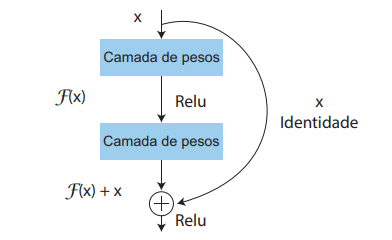

O exemplo abaixo apresenta uma visão simplificada desta arquitetura:

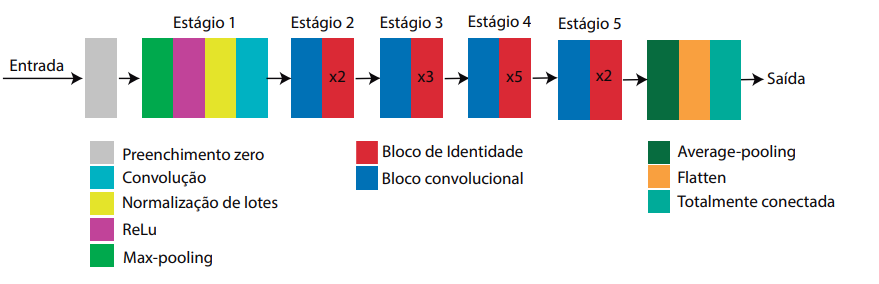

***ENTRADA:***
- é aplicado um bloco de preenchimento zero (adição de linhas e colunas com o valor zero em cada lado do filtro de convolução no formato (3,3);

***ESTÁGIO 1 (com função de ativação ReLU):***
- uma convolução 2D com 64 filtros no formato (7,7), usando uma stride de (2,2).
- uma normalização de lotes é aplicada ao eixo dos canais da entrada;
- um max-pooling usando uma matriz (3,3) com uma stride (2,2).

Nos estágios 2, 3, 4 e 5 o bloco convolucional usa três conjuntos de filtros.

***ESTÁGIO 2:***
- dois blocos de identidade que utilizam três conjuntos de filtros.

***ESTÁGIO 3:***
- três blocos de identidade usando três conjuntos de filtros.

***ESTÁGIO 4:***
- cinco blocos de identidade usando três conjuntos de filtros.

***ESTÁGIO 5:***
- dois blocos de identidade usando três conjuntos de filtros.

***AVERAGE-POOLING***
- camada de pooling usando uma matriz (2,2).

***FLATTEN***
- camada de achatamento sem  hiperparâmetros. É responsável em transformar o mapa de características para que os dados possam ser utilizados na camada totalmente conectada.

***FULLY CONNECTED + SAÍDA***
- camada totalmente conectada que reduz sua entrada para o número de classes; neste caso usando uma ativação Softmax

A técnica de transfer learning consiste de utilizar o mesmo modelo e treiná-lo para outas imagens. Por tal motivo, excluímos a última camada para modelar com as classes que definimos, ou seja, **controle**, **bacteriana** e **viral**.

Informe a quantidade de classes a serem classificadas.

In [84]:
## IMPLEMENTE

qtde_classes = 3

In [85]:
conv_base = ResNet50(include_top=False)

for layer in conv_base.layers:
    layer.trainable = False

In [86]:
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x) 

predictions = layers.Dense(qtde_classes, activation='softmax')(x)
model = Model(conv_base.input, predictions)

model.summary()

Model: "functional_15"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_7[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
______________________________________________________________________________________

In [87]:
optimizer = optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=[precision_score, recall_score, f1_score])

O número de épocas define quantas vezes o modelo irá treinar e validar o erro, assim ajustando os pesos para melhor convergência.
Escolha o número adequado de épocas para alcançarmos pelo menos **70% de precisão de validação**.

In [88]:
## IMPLEMENTE

qtde_epocas = 60


### IMPORTANTE ###
# A célula abaixo está recebendo 'warning deprecated', porém foi mantido conforme o template original 
'''WARNING:tensorflow:From <ipython-input-86-68139f1e6072>:1: Model.fit_generator (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
Please use Model.fit, which supports generators.
'''

'WARNING:tensorflow:From <ipython-input-86-68139f1e6072>:1: Model.fit_generator (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.\nInstructions for updating:\nPlease use Model.fit, which supports generators.\n'

In [89]:
history = model.fit_generator(generator=train_generator, 
                              epochs=qtde_epocas, 
                              validation_steps=5, 
                              steps_per_epoch=5, 
                              validation_data=val_generator)

Epoch 1/60
5/5 [==============================] - 17s 3s/step - loss: 1.7355 - precision_score: 0.4125 - recall_score: 0.3812 - f1_score: 0.3958 - val_loss: 1.3464 - val_precision_score: 0.5558 - val_recall_score: 0.5437 - val_f1_score: 0.5495
Epoch 2/60
5/5 [==============================] - 15s 3s/step - loss: 1.0653 - precision_score: 0.6325 - recall_score: 0.6000 - f1_score: 0.6158 - val_loss: 0.9114 - val_precision_score: 0.5392 - val_recall_score: 0.5250 - val_f1_score: 0.5319
Epoch 3/60
5/5 [==============================] - 16s 3s/step - loss: 0.7759 - precision_score: 0.6340 - recall_score: 0.5875 - f1_score: 0.6092 - val_loss: 0.6919 - val_precision_score: 0.6955 - val_recall_score: 0.6812 - val_f1_score: 0.6880
Epoch 4/60
5/5 [==============================] - 17s 3s/step - loss: 0.5532 - precision_score: 0.7647 - recall_score: 0.7312 - f1_score: 0.7476 - val_loss: 0.5787 - val_precision_score: 0.7637 - val_recall_score: 0.7312 - val_f1_score: 0.7469
Epoch 5/60
5/5 [========

Um modelo que converge bem possui o gráfico de perda (*loss*) descendente e os gráfico de precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*) em acendente.

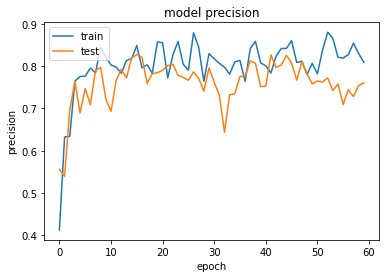

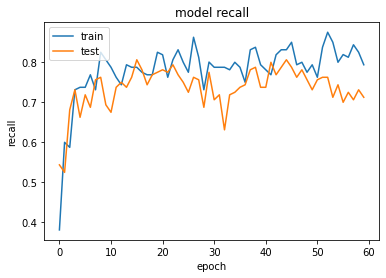

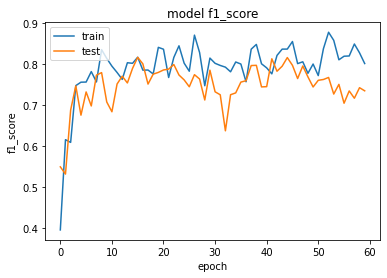

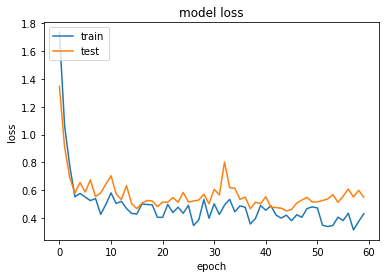

In [91]:
# Exibindo dados de Precisão
plt.plot(history.history['precision_score'])
plt.plot(history.history['val_precision_score'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Sensibilidade
plt.plot(history.history['recall_score'])
plt.plot(history.history['val_recall_score'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de F1 Score
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('model f1_score')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Perda
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Pergunta**: Avalie os gráficos de perda (*loss*), precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*)  e explique o comportamento de ambos no que tange a convergência do modelo.

**Resposta**: Os gráficos indicam que o treinamento do modelo continua convergindo até aproximadamente a época 45, após essa época, podemos observar a loss aumentando, enquanto precision, recall e f1 score diminuem. Também observamos que a partir da época 20, começamos a ter uma distância entre os dados de treino e validação, sendo aproximadamente na época 31, a pior época de todas. Isso pode ser um grande indicativo de overfit.

**Pergunta**: Quais são os valores de **precisão (precision)**, **sensibilidade (recall)** de validação? 

*Estes valores são exibidos durante o treinamento, utilize a última saída, exemplo:*

```
Epoch 10/10 [==============================] - 45s 9s/step - loss: 0.1234 - precision_score: 0.9742 - recall_score: 0.9683 - f1_score: 0.9712 - val_loss: 0.8819 - val_precision_score: 0.6912 - val_recall_score: 0.5649 - val_f1_score: 0.6216```

No caso acima, o valor de precisão, sensibilidade e pontuação de validação são, respectivamente, 69,12%, 56,49% e 62,16%.

**Resposta**:
 - Precisão: 76,02%
 - Recall: 71,25%

### 4.5.2 Arquitetura VGG16

**Pergunta**: Explique como é constituída a arquitetura do VGG16? *Utilize, se necessário, gráficos, projetos que utilizam essa arquitetura. Detalhe também sua topologia em camadas e mostre quais as situações essa arquitetura pode ter mais êxito e quais cenários não tem.*

**Resposta**: 

<p align="center">
    <img width="600px" src="https://media.geeksforgeeks.org/wp-content/uploads/20200219152207/new41.jpg">
</p>

A arquitetura VGG16 possui camadas convolucionais seguidas com uma camada max pooling e assim por diante. No final possui camadas densas totalmente conectadas para classificação através da função de ativação softmax como observamos na imagem acima.

As camadas convolucionais utilizam janelas de convolução (strides) com o menor tamanho possível necessário para que mantenha a noção de direção (cima, baixo, esquerda, direita e centro), no caso, de tamanho 3*3 pixels. Também utilizando padding nas bordas da imagem, para que dessa forma as dimensões de entrada sejam mantidas na saídas.

As camadas de max pooling utilizam strides de tamanho 2*2 sem padding.

Após o sinal da imagem passar por todas as camadas convolucionais e max pooling, chega às camadas densas, que classificam através da função de ativição softmax.

O exemplo abaixo apresenta uma visão simplificada desta arquitetura:

<p align="center">
    <img width="600px" src="https://media.geeksforgeeks.org/wp-content/uploads/20200219152327/conv-layers-vgg16-1024x450.jpg">
</p>

***ENTRADA:***
- A entrada para a camada cov1 é de imagem RGB de tamanho fixo 224 x 224.

***ESTÁGIO 1 (com função de ativação ReLU):***
- duas camadas convolucionais com 64 filtros de tamanho 3*3 e mesmo padding.
- um max-pooling com uma stride (2,2).

***ESTÁGIO 2:***
- duas camadas convolucionais com tamanho de filtro 3*3 e 256 filtros.
- um max-pooling com uma stride (2,2).

***ESTÁGIO 3:***
- três camadas convolucionais com tamanho de filtro 3*3 e 512 filtros cada e mesmo padding.
- um max-pooling com uma stride (2,2).

***ESTÁGIO 4:***
- três camadas convolucionais com tamanho de filtro 3*3 e 512 filtros cada e mesmo padding.
- um max-pooling com uma stride (2,2).

***ESTÁGIO 5:***
- três camadas convolucionais com tamanho de filtro 3*3 e 512 filtros cada e mesmo padding.
- um max-pooling com uma stride (2,2).

***FULLY CONNECTED + SAÍDA (com função de ativação ReLU***
- três camadas densas totalmente conectada que reduz sua entrada para o número de classes; neste caso usando uma ativação Softmax.
- todas as camadas ocultas utilizam ReLU como sua função de ativação.

Refêrencias:
 - https://www.geeksforgeeks.org/vgg-16-cnn-model/
 - https://neurohive.io/en/popular-networks/vgg16/#pll_switcher

In [92]:
conv_base = VGG16(include_top=False)

for layer in conv_base.layers:
    layer.trainable = False

58892288/58889256 [==============================] - 3s 0us/step


In [93]:
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x) 

predictions = layers.Dense(qtde_classes, activation='softmax')(x)
model = Model(conv_base.input, predictions)

model.summary()

Model: "functional_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128) 

In [94]:
optimizer = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=[precision_score, recall_score, f1_score])

In [95]:
history = model.fit_generator(generator=train_generator, 
                              epochs=qtde_epocas, 
                              validation_steps=5, 
                              steps_per_epoch=5, 
                              validation_data=val_generator)

Epoch 1/60
5/5 [==============================] - 35s 7s/step - loss: 2.5240 - precision_score: 0.4147 - recall_score: 0.3938 - f1_score: 0.4039 - val_loss: 2.6586 - val_precision_score: 0.3710 - val_recall_score: 0.3688 - val_f1_score: 0.3698
Epoch 2/60
5/5 [==============================] - 35s 7s/step - loss: 1.5291 - precision_score: 0.5797 - recall_score: 0.5625 - f1_score: 0.5709 - val_loss: 1.4010 - val_precision_score: 0.6491 - val_recall_score: 0.6313 - val_f1_score: 0.6398
Epoch 3/60
5/5 [==============================] - 36s 7s/step - loss: 0.9406 - precision_score: 0.7424 - recall_score: 0.7188 - f1_score: 0.7303 - val_loss: 0.8281 - val_precision_score: 0.7187 - val_recall_score: 0.7000 - val_f1_score: 0.7091
Epoch 4/60
5/5 [==============================] - 35s 7s/step - loss: 0.9654 - precision_score: 0.7388 - recall_score: 0.7250 - f1_score: 0.7317 - val_loss: 1.2381 - val_precision_score: 0.5805 - val_recall_score: 0.5625 - val_f1_score: 0.5712
Epoch 5/60
5/5 [========

Um modelo que converge bem possui o gráfico de perda (*loss*) descendente e os gráfico de precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*) em acendente.

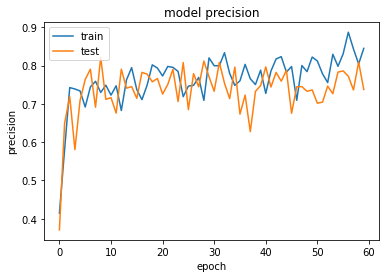

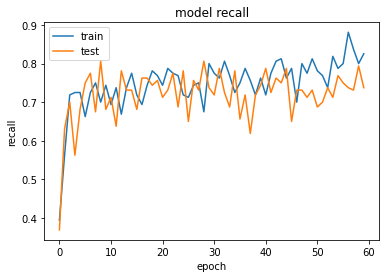

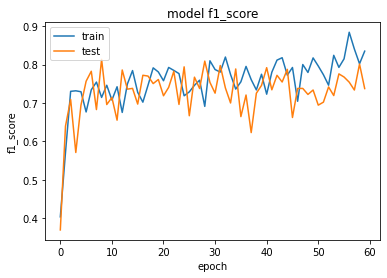

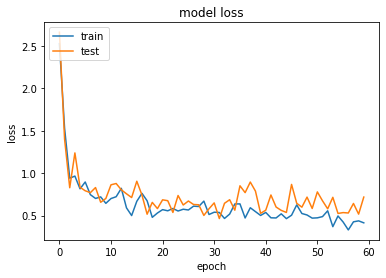

In [97]:
# Exibindo dados de Precisão
plt.plot(history.history['precision_score'])
plt.plot(history.history['val_precision_score'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Sensibilidade
plt.plot(history.history['recall_score'])
plt.plot(history.history['val_recall_score'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de F1 Score
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('model f1_score')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Perda
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Pergunta**: Avalie os gráficos de perda (*loss*), precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*)  e explique o comportamento de ambos no que tange a convergência do modelo.

**Resposta**: As métricas precision, recall e f1 score continuam melhoraram até aproximadamente a época 35, a qual começou a ter oscilações maiores, após a época 46, vemos que o treino e teste começam a se distanciar, indicando que talvez o modelo já não esteja convergindo tão bem em épocas maiores. Outro pronto interessante, é que as métricas precision, recall e f1 score apresentam o mesmo valor ao fim da época 60.

Para fazer com que o modelo continue convergindo bem em épocas maiores, podemos adicionar mais imagens de treino.

**Pergunta**: Quais são os valores de **precisão (precision)**, **sensibilidade (recall)** de validação? 

*Estes valores são exibidos durante o treinamento, utilize a última saída, exemplo:*

```
Epoch 10/10 [==============================] - 45s 9s/step - loss: 0.1234 - precision_score: 0.9742 - recall_score: 0.9683 - f1_score: 0.9712 - val_loss: 0.8819 - val_precision_score: 0.6912 - val_recall_score: 0.5649 - val_f1_score: 0.6216```

No caso acima, o valor de precisão, sensibilidade e pontuação de validação são, respectivamente, 69,12%, 56,49% e 62,16%.

**Resposta**:
 - Precisão: 73,75% 
 - Recall: 73,75%

### 4.5.3 Arquitetura VGG19

**Pergunta**: Explique como é constituída a arquitetura do VGG19? *Utilize, se necessário, gráficos, projetos que utilizam essa arquitetura. Detalhe também sua topologia em camadas e mostre quais as situações essa arquitetura pode ter mais êxito e quais cenários não tem.*

**Resposta**:

A arquitetura da VGG19 possui o mesmo conceito que a VGG16, utiliza camas convolucionais com o menor tamanho, tem camas de max pooling entre grupos de camadas convolucionais, reduzindo a dimensionalidade da imagem, e após todo esse processo, utiliza camadas densas totalmente conectadas e por fim a ultima uma função de ativação softmax, que realiza a classificação da imagem.

A principal diferença é o tamanho das arquiteturas, sendo a VGG19 maior com mais grupos de camadas convolucionais, possuindo uma melhora na convergência, porém, com maior custo computacional.

<p align="center">
    <img width="600px" src="http://media5.datahacker.rs/2018/11/vgg-ispravljeno--718x1024.png">
</p>

Referência:
 - http://datahacker.rs/deep-learning-vgg-16-vs-vgg-19/

In [102]:
conv_base = VGG19(include_top=False)

for layer in conv_base.layers:
    layer.trainable = False

In [104]:
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x) 

predictions = layers.Dense(qtde_classes, activation='softmax')(x)
model = Model(conv_base.input, predictions)

model.summary()

Model: "functional_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128) 

In [105]:
optimizer = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=[precision_score, recall_score, f1_score])

In [106]:
history = model.fit_generator(generator=train_generator, 
                              epochs=qtde_epocas, 
                              validation_steps=5, 
                              steps_per_epoch=5, 
                              validation_data=val_generator)

Epoch 1/60
5/5 [==============================] - 43s 9s/step - loss: 3.0195 - precision_score: 0.3532 - recall_score: 0.3375 - f1_score: 0.3447 - val_loss: 1.9208 - val_precision_score: 0.4243 - val_recall_score: 0.4125 - val_f1_score: 0.4181
Epoch 2/60
5/5 [==============================] - 42s 8s/step - loss: 1.4678 - precision_score: 0.5395 - recall_score: 0.5312 - f1_score: 0.5353 - val_loss: 1.0889 - val_precision_score: 0.6608 - val_recall_score: 0.6250 - val_f1_score: 0.6422
Epoch 3/60
5/5 [==============================] - 42s 8s/step - loss: 1.2206 - precision_score: 0.6216 - recall_score: 0.6062 - f1_score: 0.6137 - val_loss: 1.2634 - val_precision_score: 0.6277 - val_recall_score: 0.6125 - val_f1_score: 0.6199
Epoch 4/60
5/5 [==============================] - 43s 9s/step - loss: 1.0428 - precision_score: 0.6272 - recall_score: 0.6125 - f1_score: 0.6197 - val_loss: 1.1252 - val_precision_score: 0.6602 - val_recall_score: 0.6438 - val_f1_score: 0.6518
Epoch 5/60
5/5 [========

Um modelo que converge bem possui o gráfico de perda (*loss*) descendente e os gráfico de precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*) em acendente.

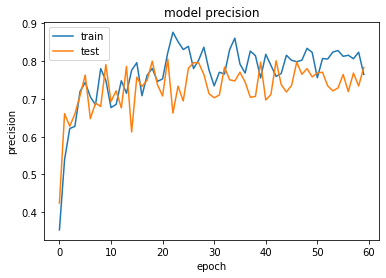

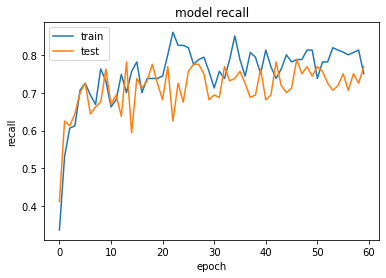

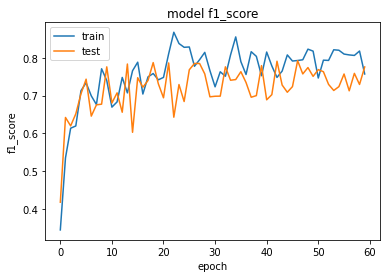

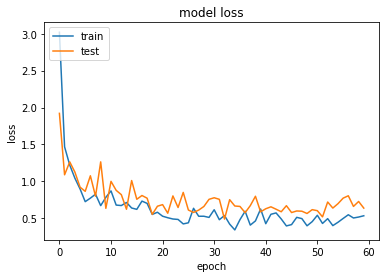

In [107]:
# Exibindo dados de Precisão
plt.plot(history.history['precision_score'])
plt.plot(history.history['val_precision_score'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Sensibilidade
plt.plot(history.history['recall_score'])
plt.plot(history.history['val_recall_score'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de F1 Score
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('model f1_score')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Perda
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Pergunta**: Avalie os gráficos de perda (*loss*), precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*)  e explique o comportamento de ambos no que tange a convergência do modelo.

**Resposta**: Podemos observar que o modelo estava convergindo muito bem até mais ou menos a época 20, após isso, todas as métricas apresentaram uma distância entre os dados de treino e de teste, tendo uma maior tendência a distância a partir da época 50, a loss também indica uma tendência a aumentar. Isso pode indicar um possivel overfit dos dados.

**Pergunta**: Quais são os valores de **precisão (precision)**, **sensibilidade (recall)** de validação? 

*Estes valores são exibidos durante o treinamento, utilize a última saída, exemplo:*

```
Epoch 10/10 [==============================] - 45s 9s/step - loss: 0.1234 - precision_score: 0.9742 - recall_score: 0.9683 - f1_score: 0.9712 - val_loss: 0.8819 - val_precision_score: 0.6912 - val_recall_score: 0.5649 - val_f1_score: 0.6216```

No caso acima, o valor de precisão, sensibilidade e pontuação de validação são, respectivamente, 69,12%, 56,49% e 62,16%.

**Resposta**:
 - Precisão: 78,32% 
 - Recall: 76,88%

## 4.6 Compartivo de arquiteturas

Preencha a tabela abaixo com os valores dos indicadores de performance apresentados.

_O cálculo do F1-Score é dado por 2 * (Precisão * Sensibilidade) / (Precisão + Sensibilidade)._

| Modelo   | Precisão (*Precision*) | Sensibilidade (*Recall*) | F1-Score |
|----------|----------|---------------|----------|
| ResNet50 | 76,02 %     | 71,25 %          | 73,49 %     |
| VGG16    | 73,75 %     | 73,75 %          | 73,75 %     |
| VGG19    | 78,32 %     | 76,88 %          | 77,58 %     |

## 4.7 Conclusões

Analise os resultados da tabela de indicadores do comparativo de arquiteturas e explique os principais motivos pelos quais cada modelo obteve cada resultado.

**Resposta**: O modelo que se saiu melhor foi o da rede neural VGG19, em todas as 3 métricas (precisão, recall e f1-score) se mostrou maior que os outros dois.

Ao analisarmos os gráficos de cada modelo, podemos observar que o modelo da ResNet50 possui a maior distância nas épocas entre os dados de treino e de teste, indicando que talvez seja mais passivel de overfit nos dados.

Em relação ao VGG16, o mesmo possui uma constância maior em relação a todos os outros nas métricas analisadas, mostrando um ajuste bem fiel aos dados ao longo das épocas, contudo, teve alguns picos bem grandes em que os dados de treino e teste se distanciaram extremamente, apesar disso, o modelo no final acabou ficando com alguams métricas menores que os outros dois, e curiosamente, com o mesmo valor entre Precisão, Recall e F1-Score.

A VGG19 atingiu o melhor resultado ao final das 60 épocas, apesar disso, podemos observar que durante toda as épocas, não teve um fit tão bem quanto a VGG16, porém, seu resultado final superou todos os demais modelos.

## 4.8 Abordagem Extra

Considerando os outros classificadores, escolha outro que ainda não foi utilizado, implemente abaixo. Ao final compare os resultados e explique os resultados.

_Não se esquece de utilizar as importações adequadas para cada modelo.
A forma de implementação deve respeitar as mesmas condições como valor de split e quantidade de imagens para poder comparar os modelos._

# Não conseguimos rodar nossa implementação abaixo devido a alto uso de CPU, sempre que tentamos acaba travando os computadores, todos os integrantes tentaram

## Mas, para não perdermos o intuito de tudo isso, acredito que a rede neural abaixo implementada se comporte parecido com a VGG16, tendo até um desempenho mais baixo em relação a ela, devido a isto, acredito que não seja tão relevante quanto os outros modelos já abordados nesse notebook

In [109]:
#IMPLEMENTE

# Nessa implementação, iremos adicionar manualmente as camadas para construir um modelo mais simples em relação aos abordados nesse notebook.
# Iremos utilizar algumas funções para realizar o tratamento inicial das imagens.

# Função para detecção de bordas
import cv2
def border_detection(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (224,224))
    img = np.uint8(img)
    img = cv2.Canny(img, 50, 80)
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    return img

# Função para transformar as imagens em imagens com a borda detectada
transformed_train_generator = []
img_train_label = []
for img_path, img_label in zip(train_generator.filepaths, train_generator.labels):
    transformed_train_generator += [border_detection(img_path)]
    img_array_label = [0,0,0]
    img_array_label[img_label] = 1
    img_train_label += [img_array_label]
    
transformed_train_generator = np.array(transformed_train_generator, dtype=np.float64)
img_train_label = np.array(img_train_label, dtype=np.uint8)

transformed_val_generator = []
img_val_label = []
for img_path, img_label in zip(val_generator.filepaths, val_generator.labels):
    transformed_val_generator += [border_detection(img_path)]
    img_array_label = [0,0,0]
    img_array_label[img_label] = 1
    img_val_label += [img_array_label]
    
transformed_val_generator = np.array(transformed_val_generator, dtype=np.float64)
img_val_label = np.array(img_val_label, dtype=np.uint8)

model = Sequential()
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), padding='same'))
model.add(Conv2D(128, (3,3), padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(256, (3,3), padding='same'))
model.add(Conv2D(256, (3,3), padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(layers.GlobalAveragePooling2D())
model.add(Dense(128))
model.add(Dense(3, 'softmax'))

model.build(input_shape=(None,224,224,3))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 256)       2

In [110]:
optimizer = optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=[precision_score, recall_score, f1_score])

In [ ]:
history = model.fit(x=transformed_train_generator, y=img_train_label, epochs=qtde_epocas, steps_per_epoch=5)

Epoch 1/60


In [ ]:
# Exibindo dados de Precisão
plt.plot(history.history['precision_score'])
plt.plot(history.history['val_precision_score'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Sensibilidade
plt.plot(history.history['recall_score'])
plt.plot(history.history['val_recall_score'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de F1 Score
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('model f1_score')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Perda
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### 4.8.1 Conclusões sobre a abordagem extra

Como seu modelo performou em comparação com os demais modelos anteriores? Justifique sua resposta levando em consideração a arquitetura respectiva.

**Resposta**: Apesar de não conseguirmos rodar o modelo, acredito que o mesmo tenha uma performance similar ou até abaixo da performance da arquitetura VGG16, visto que colocamos camadas parecidas